In [477]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [478]:
DATADIR ="PH2Dataset/PH2.19/train/"
#DATADIR = "derma-diseases/dataset/train/"

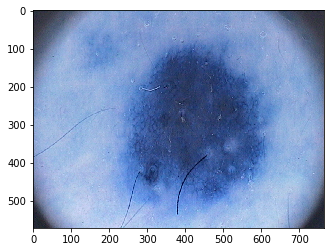

In [479]:
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#CATEGORIES = ["melanoma","nevus",'seborrheic_keratosis']

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

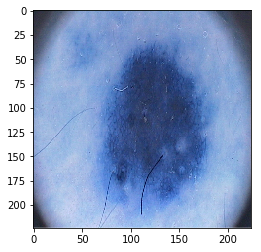

In [480]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() # it will show the image in the size i written above

In [481]:

# now i began preprocessin(make train set)
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 411.22it/s]


200


In [482]:
import random
#2 = 625
#3=55
#4=525
#5=0.525
#60
#15= 0.675
#22=70
#stop at 31
random.seed(22)
random.shuffle(training_data)#because of our data is orgnized so we need it


In [483]:
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized

1
2
1
1
1
1
1
1
1
0


In [484]:
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[41 51 52]
   [34 45 48]
   [36 48 51]
   ...
   [36 45 47]
   [41 46 47]
   [41 43 43]]

  [[36 46 52]
   [38 47 56]
   [38 47 57]
   ...
   [32 40 49]
   [39 45 53]
   [38 40 45]]

  [[28 43 55]
   [32 46 55]
   [37 46 51]
   ...
   [41 48 60]
   [38 47 58]
   [38 42 48]]

  ...

  [[31 36 48]
   [26 34 51]
   [22 38 51]
   ...
   [27 35 52]
   [35 41 58]
   [38 36 47]]

  [[28 37 51]
   [24 39 53]
   [25 40 53]
   ...
   [35 43 60]
   [35 38 56]
   [39 37 47]]

  [[27 35 49]
   [28 37 49]
   [22 42 53]
   ...
   [25 37 44]
   [31 40 47]
   [32 35 38]]]]


In [485]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()